In [1]:
import datetime as dt
import bisect
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import glob
import yaml
import pathlib
import seaborn as sns

import gspread
from oauth2client.service_account import ServiceAccountCredentials

## Analysis progress
### Choose worm strain and neuron

In [2]:
worm_strains = ['NM3573', 'GN885']#, 'GN886', 'GN887']
neurons = ['ALM', 'AVM', 'PVM']

allele_dict = {'NM3573': 'wild-type',
               'GN885': 'him-4(e1267)',
               'GN886': 'mec-1(e1066)',
               'GN887': 'mec-1(e1738)'}

### Experimental parameters

In [3]:
with open('../config.yaml') as config_file:
    config = yaml.safe_load(config_file)
    analyzed_data_dir = config['analysis_dir']
    data_dir = config['data_dir']
    
fig_save_dir = analyzed_data_dir + 'PreliminaryPlots/'

/Users/adam/Documents/SenseOfTouchResearch/SSN_data/


### Get all the metadata

In [4]:
analyzed_trials = glob.iglob(analyzed_data_dir + '*')
all_metadata = []
for trial in analyzed_trials:
    try:
        with open(trial + '/metadata.yaml') as metadata_file:
            all_metadata.append(yaml.safe_load(metadata_file))
    except FileNotFoundError:
        pass
    except NotADirectoryError:
        pass

metadata_df = pd.DataFrame(all_metadata)

### Find trials with brightfield image

In [5]:
def check_for_bf_image(row):
    date_str = (str(row['timestamp'].year).zfill(4) +
                str(row['timestamp'].month).zfill(2) +
                str(row['timestamp'].day).zfill(2))
    bf_filename = pathlib.Path(data_dir, date_str, (row['Experiment_id'] + '_bf.nd2'))
    return bf_filename.exists()
    
metadata_df['bf_image_exists'] = metadata_df.apply(check_for_bf_image, axis=1)

### Plot trials by status and worm strain

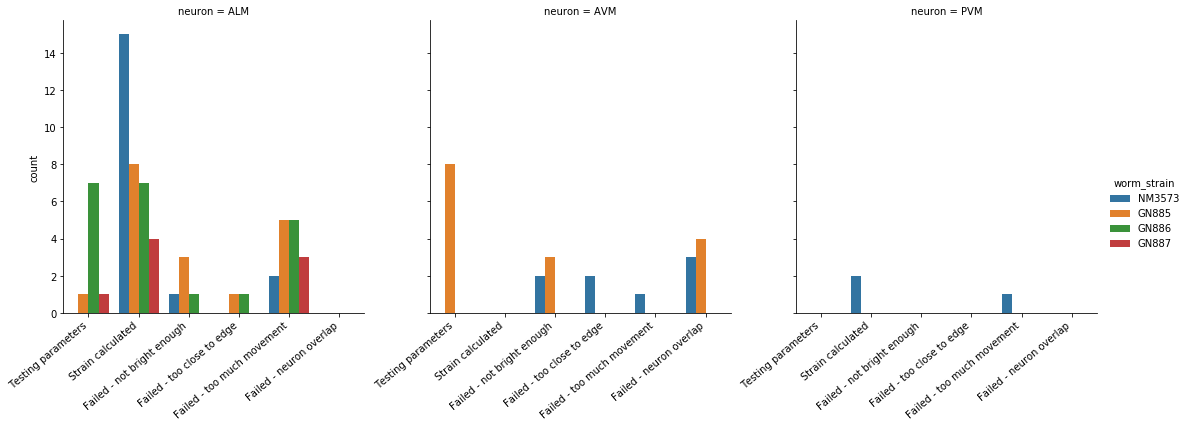

In [15]:
g = sns.catplot(x='analysis_status', hue='worm_strain', col='neuron', col_order=['ALM', 'AVM', 'PVM'],
                data=metadata_df.loc[(metadata_df['bf_image_exists'] == True)],
                kind='count', height=5, aspect=1,
                order=['Testing parameters',
                              'Strain calculated',
                              'Failed - not bright enough',
                              'Failed - too close to edge', 
                              'Failed - too much movement',
                              'Failed - neuron overlap'])
for ax_num in range(metadata_df['neuron'].unique().shape[0]):
    g.axes[0,ax_num].set_xticklabels(g.axes[0,ax_num].get_xticklabels(),rotation=40, ha='right')
    g.axes[0,ax_num].set_xlabel('')

In [8]:
range(metadata_df['neuron'].unique().shape[0])

range(0, 3)

There's a problem with these plots. Might be an issue with labels in the Dataframe.

In [9]:
metadata_df.loc[(metadata_df['bf_image_exists'] == True)]

,Experiment_id,actuator_center,actuator_corners,actuator_thickness,analysis_status,bleach_time,cultivation_temp,device_ID,head_orientation,microscope,...,slice_width_pix,stack_height,timestamp,total_images,trial_rating,user,vulva_orientation,worm_life_stage,worm_strain,bf_image_exists
16,SSN_118_001,NaN,NaN,NaN,Failed - neuron overlap,2018-12-17 09:30:00,25,Y4P7-5,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-19 14:14:23,759,,anekimke@stanford.edu,East,YA,NM3573,True
17,SSN_119_001,NaN,NaN,NaN,Failed - too close to edge,2018-12-17 09:30:00,25,Y4P7-5,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-19 14:39:05,759,,anekimke@stanford.edu,West,YA,NM3573,True
18,SSN_120_001,"[182.0, 606.0]","[184.0, 500.0, 180.0, 712.0]",26.998754,Strain calculated,2018-12-17 09:30:00,25,Y4P7-5,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-19 14:52:43,759,,anekimke@stanford.edu,West,YA,NM3573,True
19,SSN_121_001,"[212.0, 444.0]","[214.0, 339.0, 210.0, 549.0]",20.000000,Strain calculated,2018-12-17 09:30:00,25,Y4P7-5,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-19 15:03:24,759,,anekimke@stanford.edu,West,YA,NM3573,True
21,SSN_123_001,NaN,NaN,NaN,Failed - too much movement,2018-12-17 09:30:00,25,Y4P7-5,Tailfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-19 15:34:49,759,,anekimke@stanford.edu,East,YA,NM3573,True
22,SSN_124_001,NaN,NaN,NaN,Failed - too much movement,2018-12-17 09:30:00,25,Y4P7-5,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-19 15:48:18,759,,anekimke@stanford.edu,West,YA,NM3573,True
25,SSN_127_001,NaN,NaN,NaN,Failed - neuron overlap,2018-12-17 09:30:00,20,Y4P7-7,Tailfirst,Spinning Disk Confocal in CSIF Shriram,...,600,69,2018-12-20 11:19:26,759,,anekimke@stanford.edu,East,YA,NM3573,True
26,SSN_128_001,NaN,NaN,NaN,Failed - neuron overlap,2018-12-17 09:30:00,20,Y4P7-7,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,51,2018-12-20 11:30:12,561,⭐️⭐️,anekimke@stanford.edu,East,YA,NM3573,True
47,SSN_148_001,"[223.0, 479.0]","[224.0, 391.0, 222.0, 567.0]",22.999806,Strain calculated,2019-01-29 01:30:00,20,Y4P7-4,Tailfirst,Spinning Disk Confocal in CSIF Shriram,...,600,72,2019-02-01 15:24:15,792,⭐️⭐️⭐️⭐️,anekimke@stanford.edu,East,YA,NM3573,True
48,SSN_149_001,"[202.0, 481.0]","[202.0, 396.0, 202.0, 566.0]",38.000000,Failed - too much movement,2019-01-29 01:30:00,20,Y4P7-4,Headfirst,Spinning Disk Confocal in CSIF Shriram,...,600,55,2019-02-01 15:45:51,605,⭐️,anekimke@stanford.edu,East,YA,NM3573,True


## Throughput of imaging sessions
### Access google drive spreadsheet

In [10]:
scope = ['https://spreadsheets.google.com/feeds',
     'https://www.googleapis.com/auth/drive']
credentials = ServiceAccountCredentials.from_json_keyfile_name('../SenseOfTouchResearch-e5927f56c4d0.json', scope)
c = gspread.authorize(credentials)
metadataSpread = c.open_by_key('1LsTdPBOW79XSkk5DJv2ckiVTvpofAOOd_dJL4cgtxBQ')
metadataFrame = pd.DataFrame(metadataSpread.sheet1.get_all_records())

In [11]:
sdc_lin_lab_start = dt.datetime(2018, 7, 23, 12, 57, 52)
sdc_in_shriram_start = dt.datetime(2018, 9, 13, 14, 19, 9)
prime95b_camera_start = dt.datetime(2018, 11, 21, 13, 17, 36)
now = dt.datetime.now()
eras = [sdc_lin_lab_start, sdc_in_shriram_start, prime95b_camera_start, now]

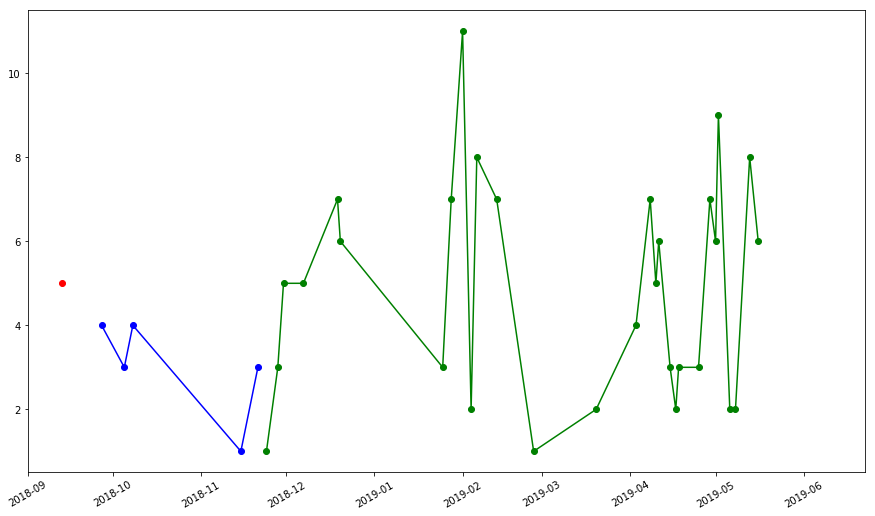

In [12]:
# helper functions
def get_worm_id(trial_id):
    worm_id = trial_id[0:7]
    
    return worm_id

def get_date(timestamp):
    this_datetime = dt.datetime.strptime(timestamp, '%m/%d/%Y %H:%M:%S')
    this_date = this_datetime.date()
    
    return this_date

# add column for worm ID
worm_id_frame = metadataFrame['Experiment ID'].apply(get_worm_id)
metadataFrame['worm id'] = worm_id_frame

# eliminate rows that have duplicate worms
metadataFrame.drop_duplicates(subset=['worm id'], inplace=True)

# add column for date
date_frame = metadataFrame['Timestamp'].apply(get_date)
metadataFrame['date'] = date_frame
# display(metadataFrame)
    
# for each date
date_list = metadataFrame['date'].tolist()
unique_dates = sorted(list(set(date_list)))
epi_scope_start_index = bisect.bisect(unique_dates, sdc_lin_lab_start.date())
num_worms = {}
worm_count = []
exp_date = []
for this_date in unique_dates:
    # get number of unique worm IDs
    this_day_worms = metadataFrame.loc[metadataFrame['date'] == this_date]
    worm_count.append(len(this_day_worms))
        
# make a plot
bar_width = 2
fig, ax = plt.subplots()
colors = ['k', 'r', 'b', 'g']
for era, color in zip(eras, colors):
    # plot everything in each setup era
    era_start_index = bisect.bisect(unique_dates, era.date())
    this_era_dates = unique_dates[0:era_start_index]
    this_era_counts = worm_count[0:era_start_index]
    for date, count in zip(this_era_dates, this_era_counts):
        unique_dates.remove(date)
        worm_count.remove(count)
    ax.plot_date(this_era_dates, this_era_counts, xdate=True, color=color, linestyle='-')

ax.xaxis_date()
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
left, right = plt.xlim() 
plt.xlim((dt.date(2018, 9, 1), right)) 
fig.set_size_inches(15, 8.5)
